***CONCRETE COMPRESIVE STRENGTH PREDICTION***

**regression presentation link**

https://drive.google.com/file/d/1M5T-ycyI4YJeN2jN6gVBGtkgowv_JSaP/view?usp=drive_link

Importing libraries


In [ ]:
#import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




Loading the data set


In [ ]:
# Read the dataset
data = pd.read_excel('/content/Concrete_Data.xls')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


EDA

1)Listing the variables

In [ ]:
# Find numerical variables
numerical_vars = [col for col in data.columns if data[col].dtype != 'object']
print('There are {} numerical variables\n'.format(len(numerical_vars )))
print('The numerical variables are:\n\n', numerical_vars )

There are 9 numerical variables

The numerical variables are:

 ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


2)checking missing values


In [ ]:

# Find missing values in the dataset
missing_values = data.isnull().sum()

if missing_values.sum() == 0:
    print("No missing data in the dataset.")
else:
    print("Missing values in each column:")
    print(missing_values)


No missing data in the dataset.


3)duplicate data

In [ ]:
data.duplicated().sum()

25

4)Data information and Distribution of data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

5)distribution of data

In [ ]:

data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


6)shape of the data

In [ ]:
data.shape

(1030, 9)

Data Visualization


In [ ]:
#renaming the columns
data.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','course_Aggregate','fine_aggregate','age','concrete_strength']

In [ ]:
corr = data.corr()
corr

,cement,blastFurnace,flyAsh,water,superplasticizer,course_Aggregate,fine_aggregate,age,concrete_strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blastFurnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
course_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
concrete_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000




*  Creating histograms for the variables




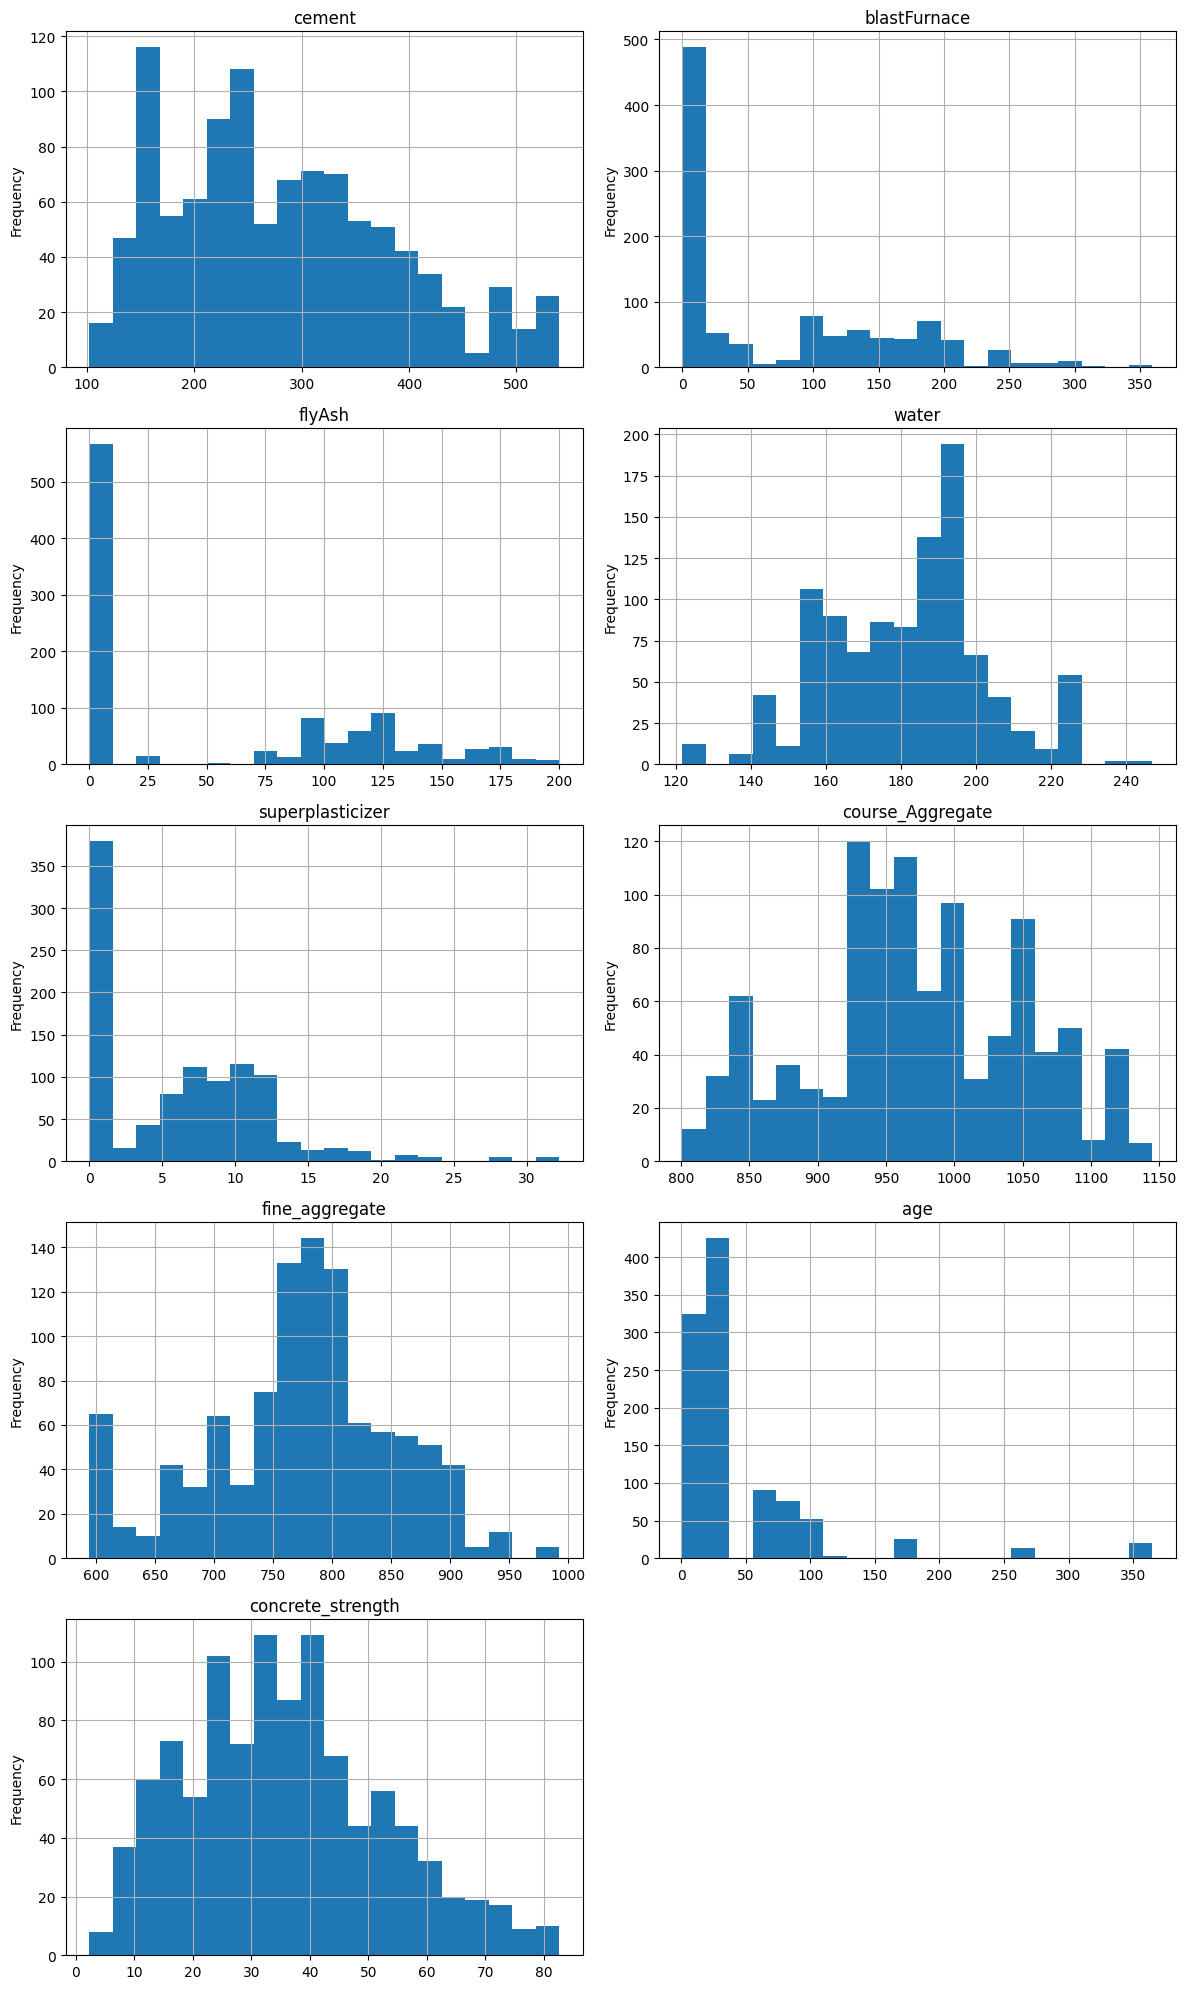

In [ ]:
# Draw histograms for each column in the dataset
num_columns = data.shape[1]
num_rows = (num_columns + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))  # Adjust figsize based on num_rows

# Flatten axes if multiple rows are used
axes = axes.flatten()

for i, column in enumerate(data.columns):
    data[column].hist(ax=axes[i], bins=20)  # Adjust bins as needed
    axes[i].set_title(f"{column}")
   # axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# If there's an odd number of columns, remove the empty subplot
if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Adjust layout for spacing between subplots
plt.show()




*   Creating correlation Heatmap




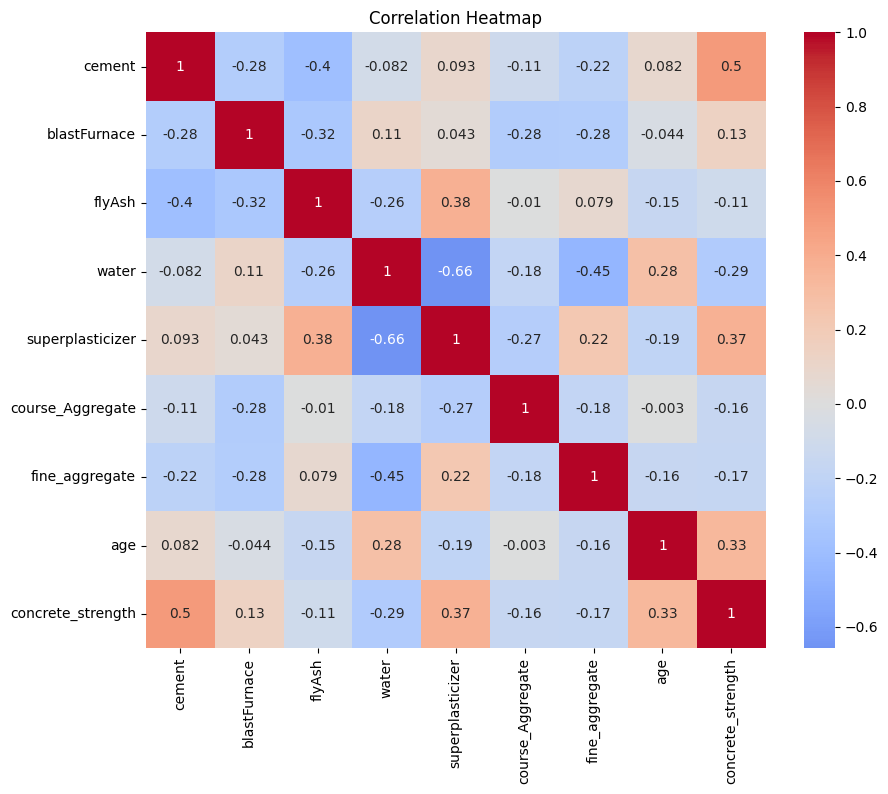

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()





*  Creating bins for the data




In [ ]:
#create bins from compressive strength
bins = pd.qcut(data['concrete_strength'], q=4)

#add bins to concrete df
data['bins']=bins



*  Bivariate analysis using pairplot




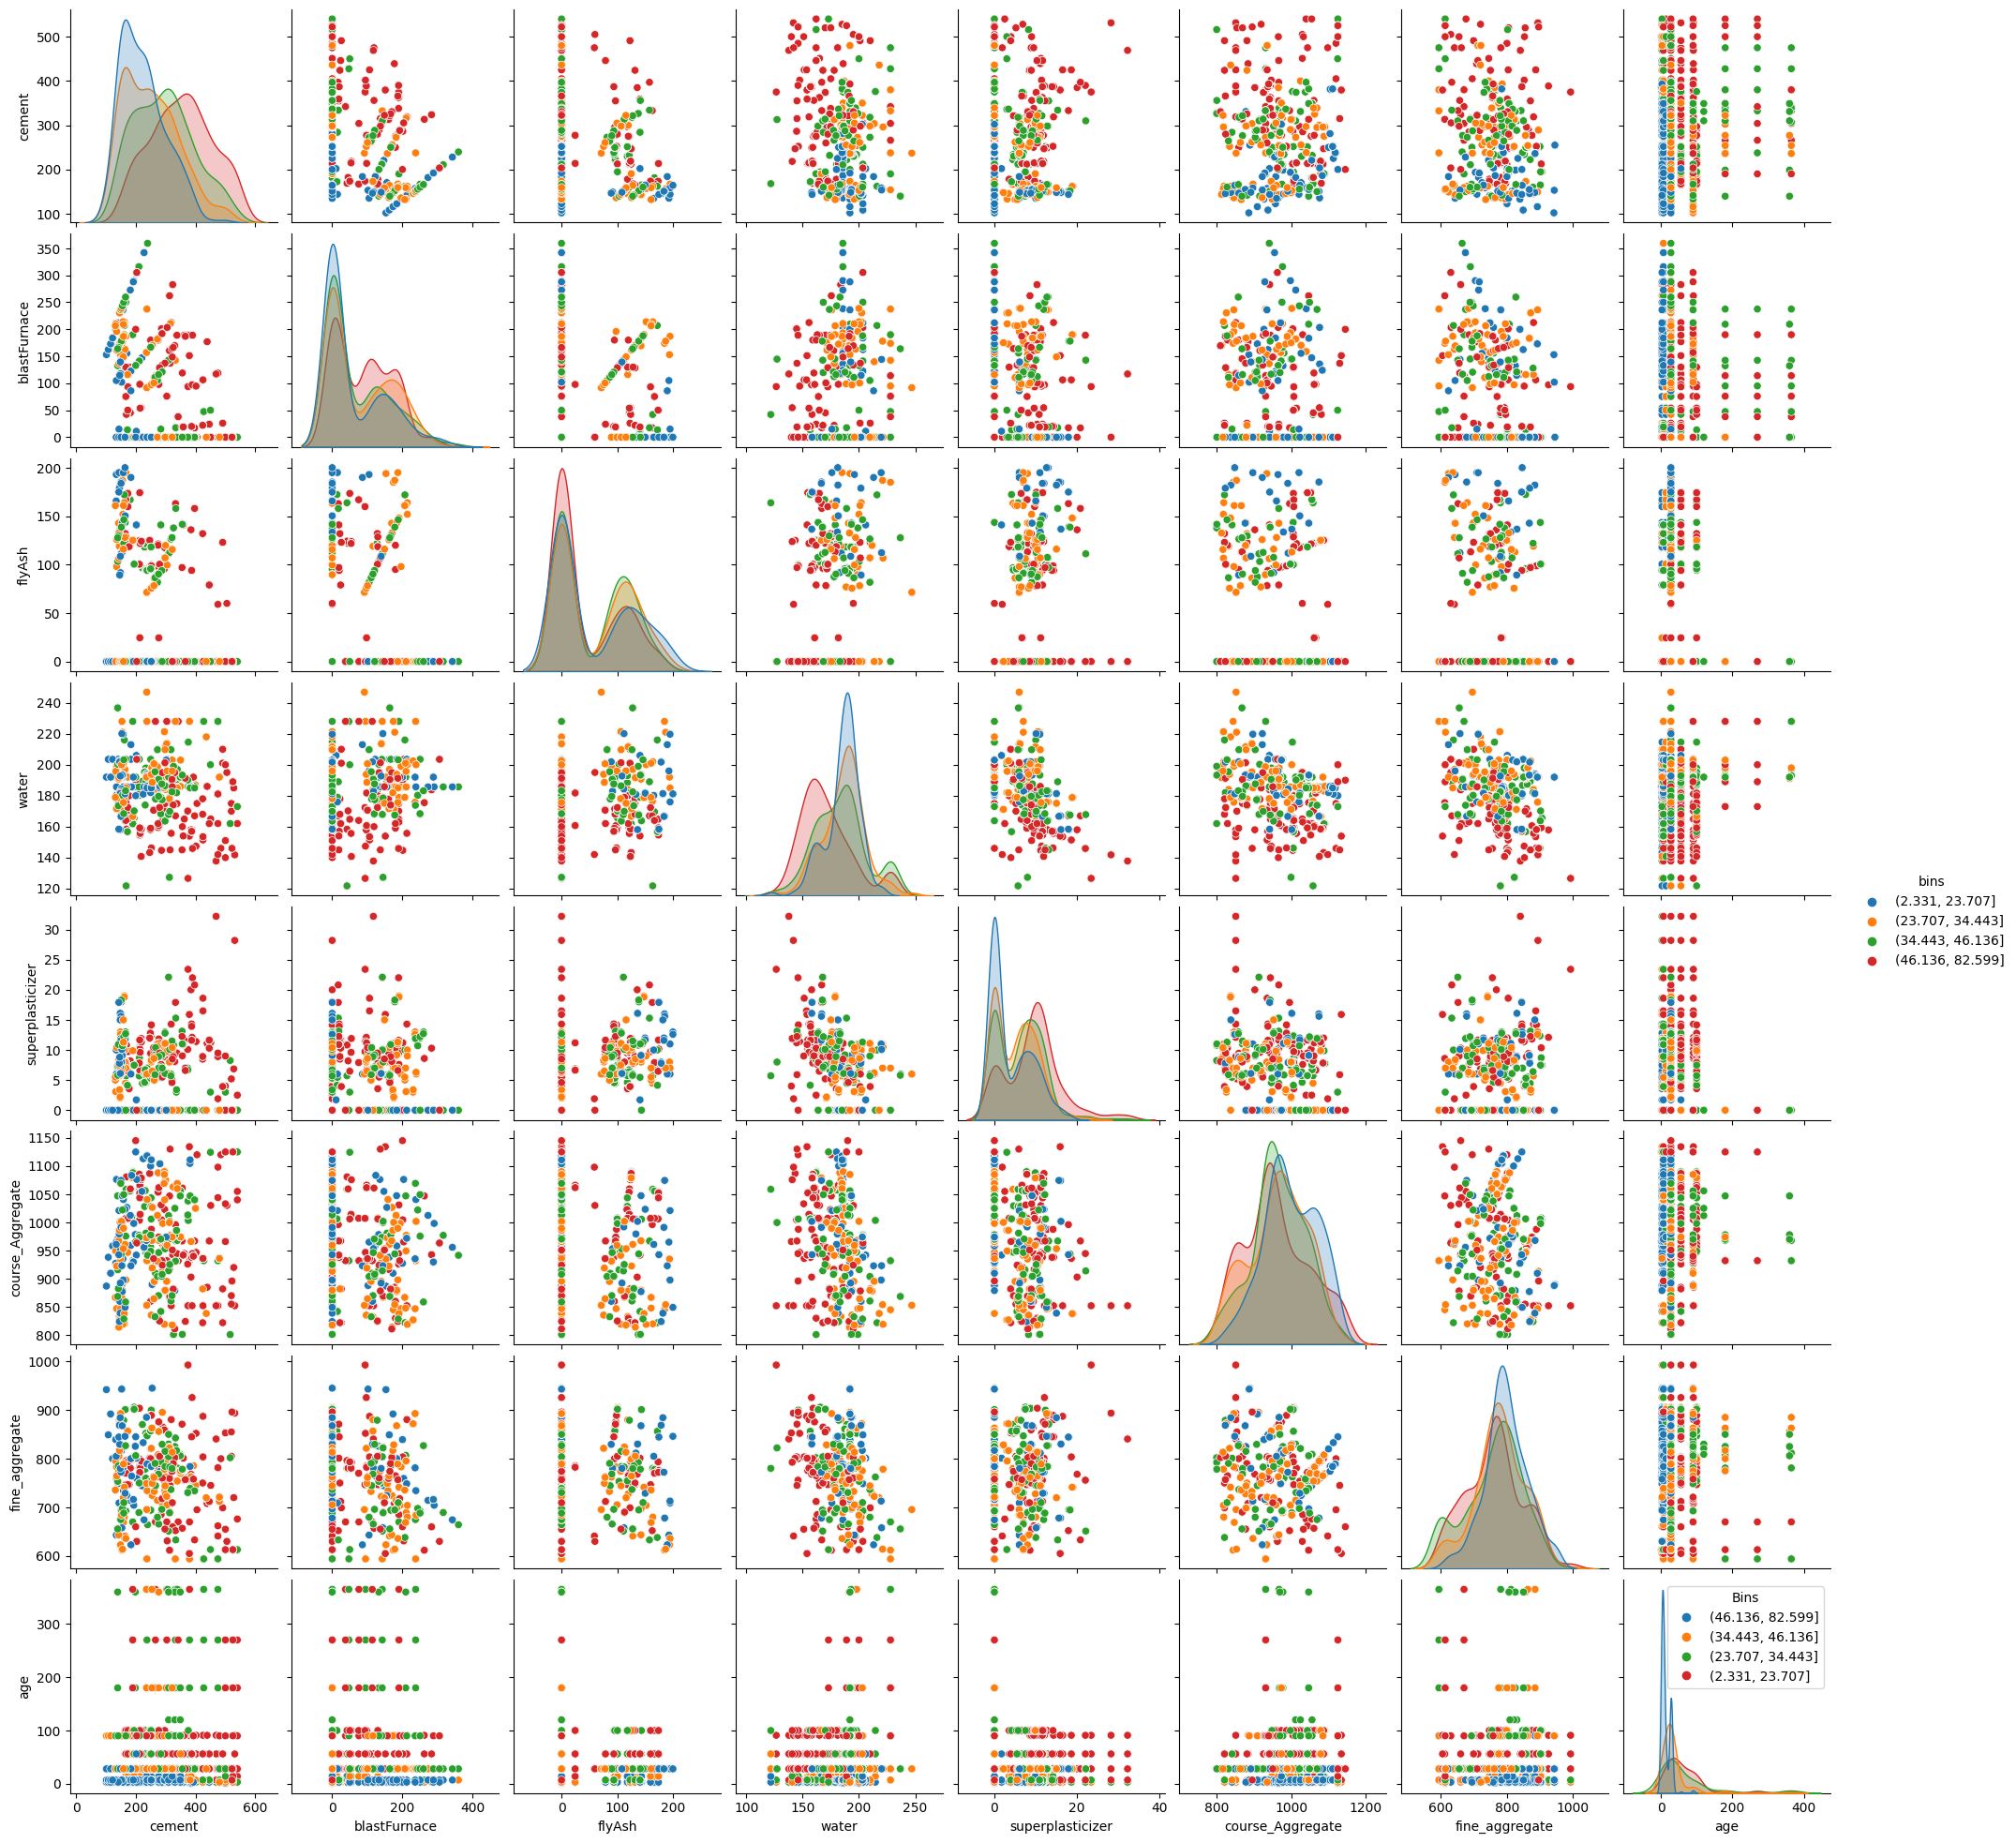

In [ ]:

# Look at how target is distributed among variables using a pairplot
sns.pairplot(data.loc[:, (data.columns != 'concrete_strength')], hue='bins')

# Get the unique values from the 'bins' column
unique_bins = data['bins'].unique()

# Create a custom legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=bin_val,
                             markersize=8, markerfacecolor=sns.color_palette()[i])
                  for i, bin_val in enumerate(unique_bins)]

# Add the legend to the plot
plt.legend(handles=legend_handles, title='Bins')
plt.show()


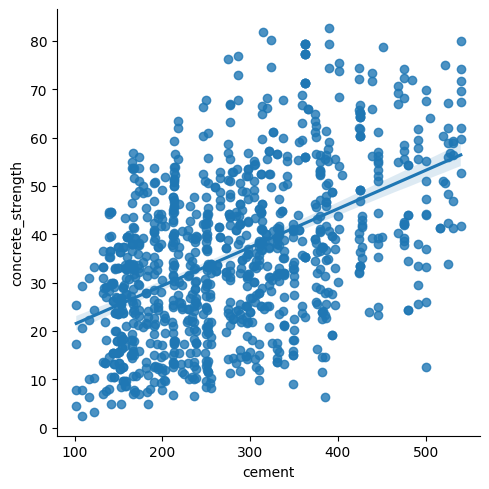

In [ ]:
#plot strongest linear correlation
sns.lmplot(x='cement', y='concrete_strength',data=data)
plt.show()

code to perform scaling and transformation on the given data set

In [ ]:
#importing scikit-learn library to perform scaling and transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [ ]:
# Standardization using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('bins', axis=1))

# Now you can use the scaled_data for further analysis


In [ ]:
# Min-max scaling using MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_min_max = min_max_scaler.fit_transform(data.drop('bins', axis=1))


In [ ]:
# Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data.drop('bins', axis=1))


In [ ]:
print("Scaled Data:")
print(scaled_data)
print("\nMin-Max Scaled Data:")
print(scaled_min_max)

print("\nTransformed Data after PCA:")
print(transformed_data)

Scaled Data:
[[ 2.47791782 -0.85688631 -0.84713204 ... -1.21765845 -0.27973311
   2.64519215]
 [ 2.47791782 -0.85688631 -0.84713204 ... -1.21765845 -0.27973311
   1.5612771 ]
 [ 0.49144303  0.79553263 -0.84713204 ... -2.24091255  3.55306569
   0.26660766]
 ...
 [-1.2700575   0.75958527  0.85066095 ...  0.08012724 -0.27973311
  -0.7259282 ]
 [-1.16857975  1.3080724  -0.84713204 ...  0.19118775 -0.27973311
  -0.18264932]
 [-0.19401043  0.30850389  0.37696733 ... -0.15072887 -0.27973311
  -0.20461667]]

Min-Max Scaled Data:
[[1.         0.         0.         ... 0.20572002 0.07417582 0.9674449 ]
 [1.         0.         0.         ... 0.20572002 0.07417582 0.7419643 ]
 [0.52625571 0.39649416 0.         ... 0.         0.73901099 0.47264169]
 ...
 [0.10616438 0.38786867 0.54272864 ... 0.46663322 0.07417582 0.26617018]
 [0.1303653  0.51947691 0.         ... 0.48896136 0.07417582 0.37918535]
 [0.36278539 0.27963272 0.39130435 ... 0.42022077 0.07417582 0.37461561]]

Transformed Data after PCA:


code to perform text data transformation

In [ ]:
#importing  `CountVectorizer` from the `scikit-learn` library to transform text data into a bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(data)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the transformed data to an array
X_array = X.toarray()

print("Feature Names:", feature_names)
print("\nTransformed Data:")
print(X_array)



Feature Names: ['age' 'bins' 'blastfurnace' 'cement' 'concrete_strength'
 'course_aggregate' 'fine_aggregate' 'flyash' 'superplasticizer' 'water']

Transformed Data:
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


 Python code that demonstrates working with date and time features using the `datetime` module

In [ ]:
from datetime import datetime, timedelta
# Get the current date and time
current_datetime = datetime.now()
print("Current Date and Time:", current_datetime)

# Create a specific date and time
specific_datetime = datetime(2023, 8, 31, 15, 30, 0)
print("Specific Date and Time:", specific_datetime)

# Formatting a datetime object as a string
formatted_date = specific_datetime.strftime('%Y-%m-%d %H:%M:%S')
print("Formatted Date:", formatted_date)

# Parsing a string into a datetime object
parsed_date = datetime.strptime('2023-08-31 15:30:00', '%Y-%m-%d %H:%M:%S')
print("Parsed Date:", parsed_date)

# Performing calculations with timedelta
time_difference = current_datetime - specific_datetime
print("Time Difference:", time_difference)

# Adding a timedelta to a datetime
new_datetime = specific_datetime + timedelta(days=7, hours=3)
print("New Date and Time:", new_datetime)


Current Date and Time: 2023-08-31 18:56:13.429557
Specific Date and Time: 2023-08-31 15:30:00
Formatted Date: 2023-08-31 15:30:00
Parsed Date: 2023-08-31 15:30:00
Time Difference: 3:26:13.429557
New Date and Time: 2023-09-07 18:30:00


Python code that demonstrates feature selection using the `SelectKBest` method from the `scikit-learn` library




In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, chi2


# Perform feature selection using SelectKBest with chi-squared scoring
k_best = SelectKBest(score_func=chi2, k=5)  # Select the top 5 features
X_new = k_best.fit_transform(X, y)

# Print the selected features
print("\nSelected features:")
print(X_new[:5])

NameError: ignored

Python code that demonstrates dimensionality reduction using the `PCA` (Principal Component Analysis) method from the `scikit-learn` library

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # Features

# Create an instance of PCA with 2 principal components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

print("Original Data Shape:", X.shape)
print("Reduced Data Shape:", X_pca.shape)


Original Data Shape: (150, 4)
Reduced Data Shape: (150, 2)


Python code that demonstrates creating interactions and polynomial features using the `PolynomialFeatures` class from the `scikit-learn` library

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Sample dataset
data = np.array([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create an instance of PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the data to include interactions and polynomial features
data_poly = poly.fit_transform(data)

print("Original Data Shape:", data.shape)
print("Transformed Data Shape:", data_poly.shape)
print("Transformed Data:")
print(data_poly)

Original Data Shape: (3, 2)
Transformed Data Shape: (3, 6)
Transformed Data:
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]


Python code that demonstrates how to perform validation and testing using the `train_test_split` function and a simple classification model from the `scikit-learn` library

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of LogisticRegression
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



Accuracy: 1.0


Python code that demonstrates how to monitor the performance of a machine learning model using cross-validation and performance metrics from the `scikit-learn` library:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Create an instance of LogisticRegression
model = LogisticRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Accuracy: 0.9733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
